## Homework 09

1. Explain the coefficient of determination ($R^2$).
2. The mpg dadaset contains the target mpg, and the following features: 
  - cylinders
  - displacement 
  - acceleration 
  - model: the model year
  - origin: where the vehicles were manufactured
  
Plot the scatter plot matrix and correlation matrix.

```python
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/mpg.csv')

```
Hint: check the missing value

3. Split the data (20% test, 80% training), predict the mpg by linear regression, print the $R^2$ and MSE in both the training and test set, plot the residual. What does the residual plot tell you?
4. In two to three paragraphs of prose (i.e. sentences, not bullet lists), summarize and interact with the content that was covered this week in readings and in class meeting. In your summary, you should highlight the major topics, methods, and practices that were covered. Your summary should also interact with the material through personal observations, reflections, and applications to the field of study. In particular, highlight what surprised, enlightened, or otherwise engaged you. In other words, you should think and write critically not just about what was presented but also what you have learned through the session.

The coefficient of determination is the percentage of the response variance that we can explain with using a linear model. We can use this coefficient to see how the differences within one variable are able to be explained by the differences found in a second variable.

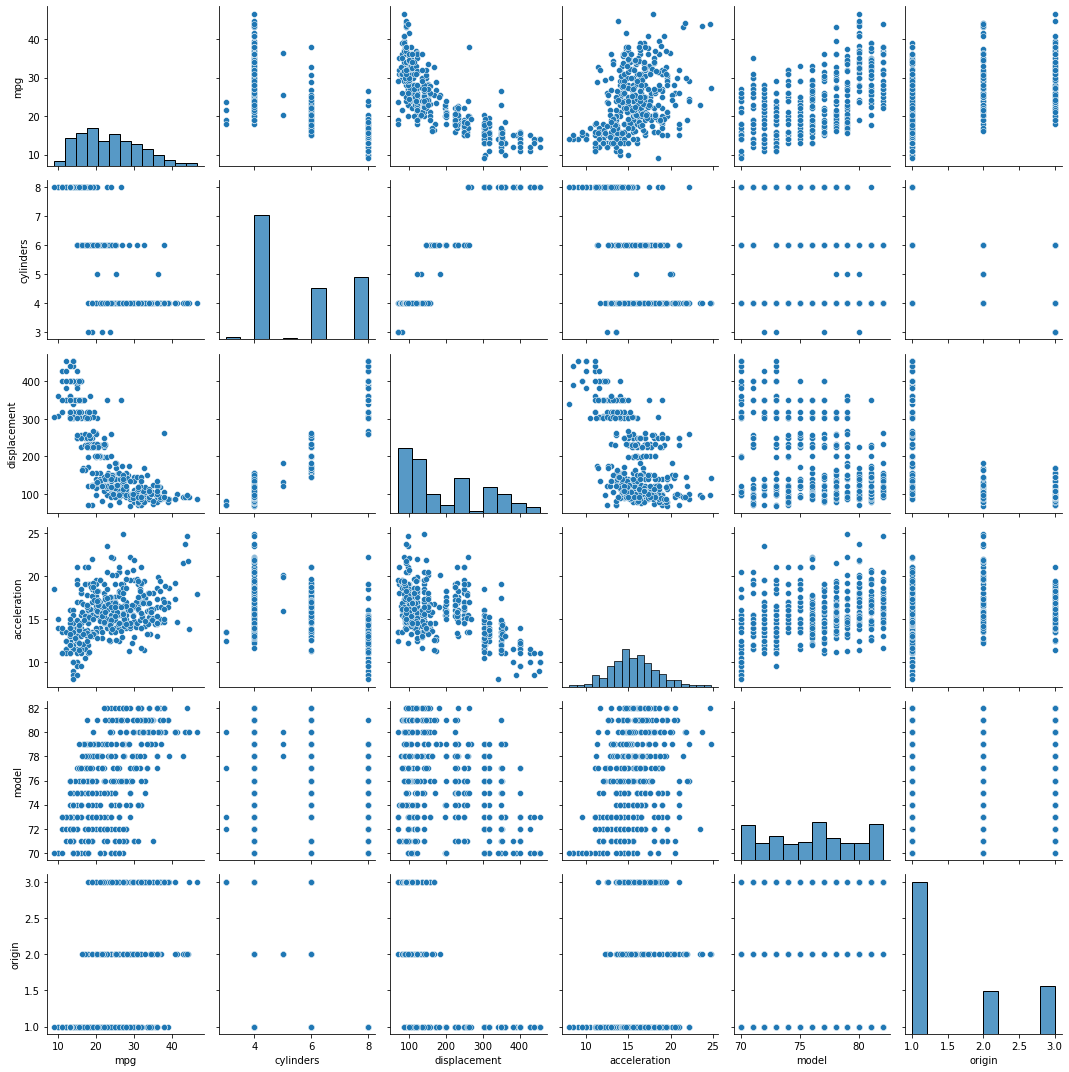

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/mpg.csv')
df.columns = ['mpg', 'cylinders', 'displacement', 'acceleration', 'model', 'origin']
df = df.dropna(axis=0)
cols = ['mpg', 'cylinders', 'displacement', 'acceleration', 'model', 'origin']
sns.pairplot(df[cols], height=2.5)
plt.tight_layout()

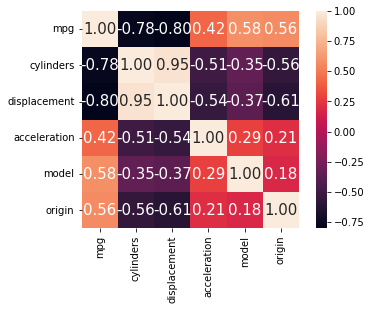

In [2]:
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)

plt.show()

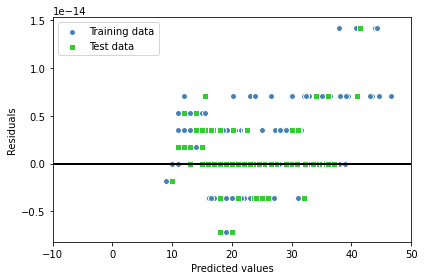

MSE train: 0.000, test: 0.000
R^2 train: 1.000, test: 1.000
Tells that there are some outliers


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X = df.iloc[:, :-1].values
y = df['mpg'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('Tells that there are some outliers')

This week we looked at how we can predict continuous target variables by using regression analysis. We start with the scatterplot matrix which helps show if there are outliers within each column of the data set. We then went on to the correlation matrix which shows as a heatmap and determines the correlation coefficients are their placement in the range. We can take the data we found and then create a linear regression model. Splitting the data into test and train sets then lets us plot the predicted values and the residuals. If we want to deal with relationships that are nonlinear then we can use forests and trees to determine the regression and the residuals graph.